In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn

#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True)

from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, Input, MaxPooling1D, SpatialDropout1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_label = pd.read_excel("dataset_FINAL_afterPreprocessing.xlsx")
df_label = df_label['LabelFinal']

In [3]:
#SIMILARITY TOP AND CORPUS IN SCENARIO V
    #Corpus: Tweet + Berita
    #Top: 1, 5, 10, 15
df_tfidf = pd.read_csv("fe_TFIDF_df_top1_tweetberita.csv")
df_tfidf.drop('Unnamed: 0', axis=1, inplace=True)
df_tfidf

,aamiin,abai,abang,abdi,abdul,abis,abu,abu waras,abur,abuse,...,zhico,zina,zoelfick,zon,zrn,zulfiarrahman,zulkiflilubis,zumhana,zusen,zusen tahan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = pd.read_excel("dataset_FINAL_afterPreprocessing.xlsx")
vectorizer = TfidfVectorizer(ngram_range = (1,2), max_features=10000)
vectorizer = vectorizer.fit(df['Text'])

tf_len = len(vectorizer.vocabulary_)

In [14]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df_tfidf, df_label, test_size=0.1)

In [15]:
train_x = np.array(train_x).reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = np.array(test_x).reshape(test_x.shape[0], test_x.shape[1], 1)

In [7]:
model = Sequential()
model.add(Input(shape=(tf_len, 1)))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(filters=50, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(filters=15, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(train_x, train_y, epochs=5)

Epoch 1/5
713/713 [==============================] - 819s 1s/step - loss: 0.2808 - accuracy: 0.8274
Epoch 2/5
713/713 [==============================] - 800s 1s/step - loss: 0.2745 - accuracy: 0.8259
Epoch 3/5
713/713 [==============================] - 776s 1s/step - loss: 0.2714 - accuracy: 0.8301
Epoch 4/5
713/713 [==============================] - 800s 1s/step - loss: 0.2721 - accuracy: 0.8311
Epoch 5/5
713/713 [==============================] - 706s 990ms/step - loss: 0.2631 - accuracy: 0.8323


In [17]:
cnn_output = model.predict(test_x)

80/80 [==============================] - 9s 108ms/step


In [18]:
from sklearn.svm import SVC
classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
classifier.fit(cnn_output, test_y)

SVC(gamma='auto', kernel='linear')

In [19]:
predictions = classifier.predict(cnn_output)

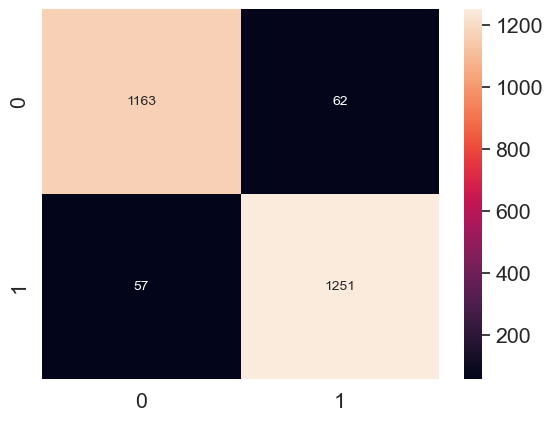

In [20]:
def plot_confussion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

plot_confussion_matrix(test_y, predictions)

In [21]:
print(classification_report(test_y, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.953279  0.949388  0.951329      1225
           1   0.952780  0.956422  0.954597      1308

    accuracy                       0.953020      2533
   macro avg   0.953029  0.952905  0.952963      2533
weighted avg   0.953021  0.953020  0.953017      2533

